Dataset obtained from https://www.kaggle.com/anerisavani/life-expectancy-eda
Code inspired/obtained from https://www.kaggle.com/anerisavani/life-expectancy-eda

In [27]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize

In [28]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

In [29]:
life_expectancy.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [31]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [32]:
# rename columns to be standardized
life_expectancy.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [37]:
# interpolate missing values using country
life_expectancy.reset_index(inplace=True)
life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))

,index,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.010,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,16,Albania,2015,Developing,77.8,74.0,0,4.600,364.975229,99.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,32,Algeria,2015,Developing,75.6,19.0,21,5.285,0.000000,95.0,...,95.0,7.08,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,48,Angola,2015,Developing,52.4,335.0,66,5.285,0.000000,64.0,...,7.0,7.08,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,5.285,0.000000,99.0,...,86.0,7.08,99.0,0.2,13566.954100,2076086.0,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2873,Venezuela (Bolivarian Republic of),2000,Developing,72.5,168.0,11,8.010,0.000000,5.0,...,86.0,4.91,77.0,0.1,828.989862,1243229.0,1.8,1.7,0.670,10.6
2934,2889,Viet Nam,2000,Developing,73.4,139.0,33,1.600,0.000000,89.0,...,96.0,4.89,96.0,0.1,828.989862,1243229.0,15.8,16.4,0.569,10.4
2935,2905,Yemen,2000,Developing,68.0,252.0,48,0.070,0.000000,14.0,...,74.0,4.14,74.0,0.1,828.989862,1243229.0,14.1,14.1,0.436,7.7
2936,2921,Zambia,2000,Developing,43.8,614.0,44,2.620,45.616880,89.0,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [38]:
# interpolate missing data by filling in using yearwise median
imputed_data = []
for year in list(life_expectancy.Year.unique()):
    year_data = life_expectancy[life_expectancy.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()

In [39]:
life_expectancy.describe()

,index,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,1468.500000,2007.518720,69.238462,164.695031,30.303948,4.637600,738.251295,82.644656,2419.592240,38.386555,...,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,848.271871,4.613841,9.510459,124.092441,117.926501,3.921306,1987.914858,22.881890,11467.272489,19.939693,...,23.362728,2.416410,23.649290,5.077785,13284.996285,5.402084e+07,4.397466,4.485674,0.205378,3.267787
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.250000,2004.000000,63.200000,74.000000,0.000000,1.082500,4.685343,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,1468.500000,2008.000000,72.100000,144.000000,3.000000,4.100000,64.912906,91.000000,17.000000,43.450000,...,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2202.750000,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [40]:
print(life_expectancy.isnull().sum())

index                              0
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_1-19_years                0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


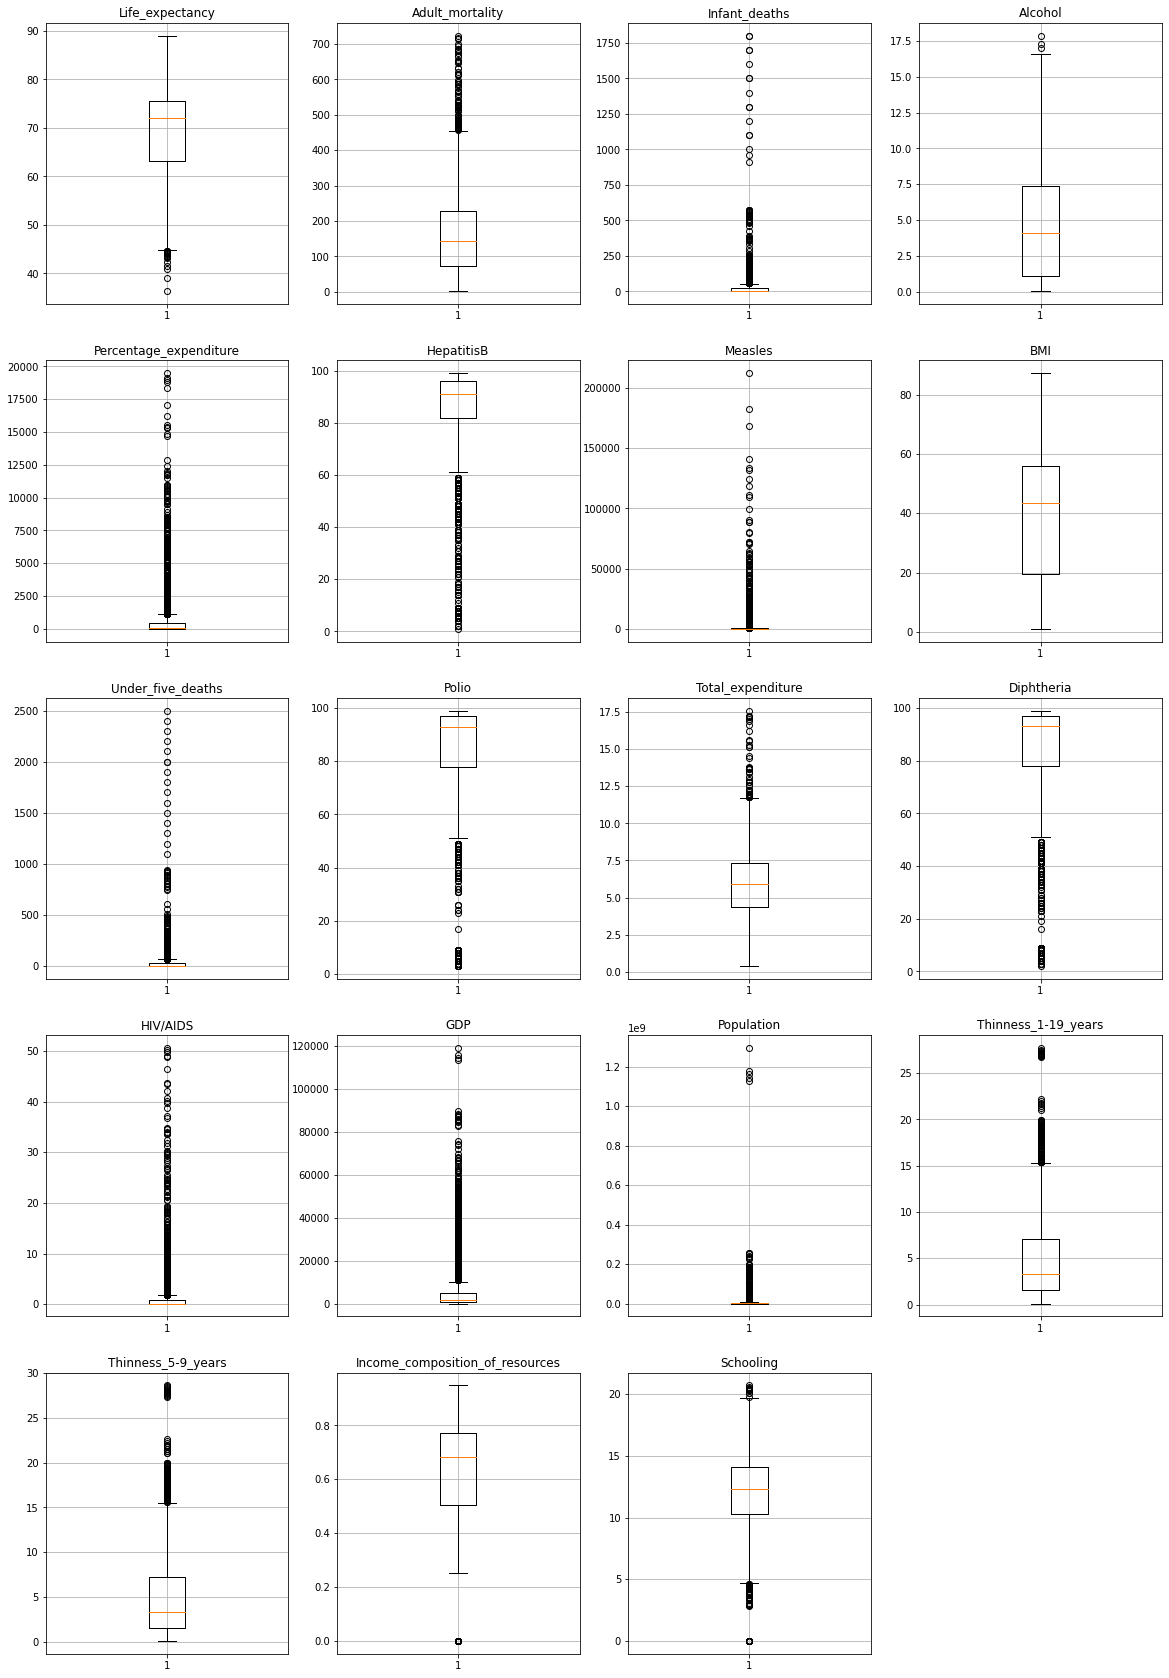

In [41]:
# now we want to remove outliers
col_dict = {'Life_expectancy':1,'Adult_mortality':2,'Infant_deaths':3,'Alcohol':4,'Percentage_expenditure':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_five_deaths':9,'Polio':10,'Total_expenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness_1-19_years':16,'Thinness_5-9_years':17,'Income_composition_of_resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

In [43]:
# for Infant_Deaths, Measles, Under_five_deaths are all 'number per 1000 population',
# so values of over 1000 don't make sense
life_expectancy = life_expectancy[life_expectancy['Infant_deaths'] <= 1000]
life_expectancy = life_expectancy[life_expectancy['Measles'] <= 1000]
life_expectancy = life_expectancy[life_expectancy['Under_five_deaths'] <= 1000]

In [45]:
# BMI is scewed extremely high in most entries so we'll just get rid of it
life_expectancy.drop(['BMI'], axis=1, inplace=True)

In [90]:
# Percentage_expenditure, GDP, Population all have large numbers of extreme outliers
life_expectancy['log_Percentage_expenditure'] = np.log(life_expectancy['Percentage_expenditure'])
life_expectancy['log_Population'] = np.log(life_expectancy['Population'])
life_expectancy['log_GDP'] = np.log(life_expectancy['GDP'])
life_expectancy = life_expectancy.replace([np.inf, -np.inf], 0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [91]:
# everything else also has a number of outliers so we'll windsorize them
life_expectancy['winz_Life_expectancy'] = winsorize(life_expectancy['Life_expectancy'], (0.05,0))
life_expectancy['winz_Adult_mortality'] = winsorize(life_expectancy['Adult_mortality'], (0,0.04))
life_expectancy['winz_Alcohol'] = winsorize(life_expectancy['Alcohol'], (0.0,0.01))
life_expectancy['winz_HepatitisB'] = winsorize(life_expectancy['HepatitisB'], (0.20,0.0))
life_expectancy['winz_Polio'] = winsorize(life_expectancy['Polio'], (0.20,0.0))
life_expectancy['winz_Total_expenditure'] = winsorize(life_expectancy['Total_expenditure'], (0.0,0.02))
life_expectancy['winz_Diphtheria'] = winsorize(life_expectancy['Diphtheria'], (0.11,0.0))
life_expectancy['winz_HIV/AIDS'] = winsorize(life_expectancy['HIV/AIDS'], (0.0,0.21))
life_expectancy['winz_Thinness_1-19_years'] = winsorize(life_expectancy['Thinness_1-19_years'], (0.0,0.04))
life_expectancy['winz_Thinness_5-9_years'] = winsorize(life_expectancy['Thinness_5-9_years'], (0.0,0.04))
life_expectancy['winz_Income_composition_of_resources'] = winsorize(life_expectancy['Income_composition_of_resources'], (0.05,0.0))
life_expectancy['winz_Schooling'] = winsorize(life_expectancy['Schooling'], (0.03,0.01))

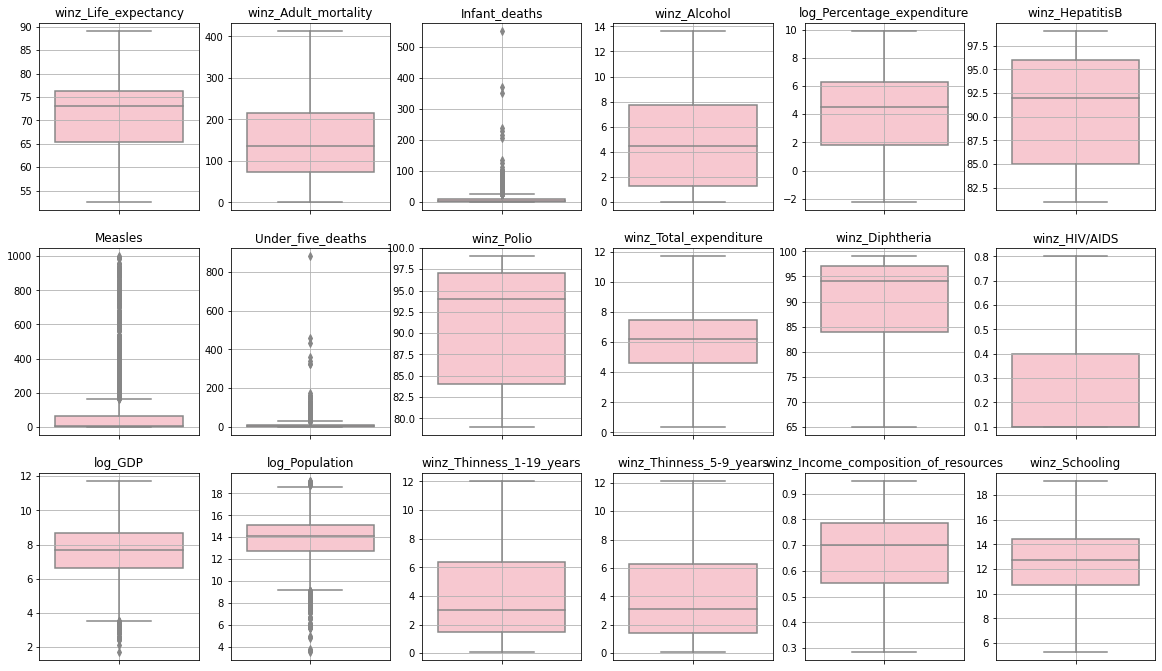

In [92]:
col_dict_winz = {'winz_Life_expectancy':1,'winz_Adult_mortality':2,'Infant_deaths':3,'winz_Alcohol':4,
            'log_Percentage_expenditure':5,'winz_HepatitisB':6,'Measles':7,'Under_five_deaths':8,'winz_Polio':9,
            'winz_Total_expenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'log_GDP':13,'log_Population':14,
            'winz_Thinness_1-19_years':15,'winz_Thinness_5-9_years':16,'winz_Income_composition_of_resources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = life_expectancy[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

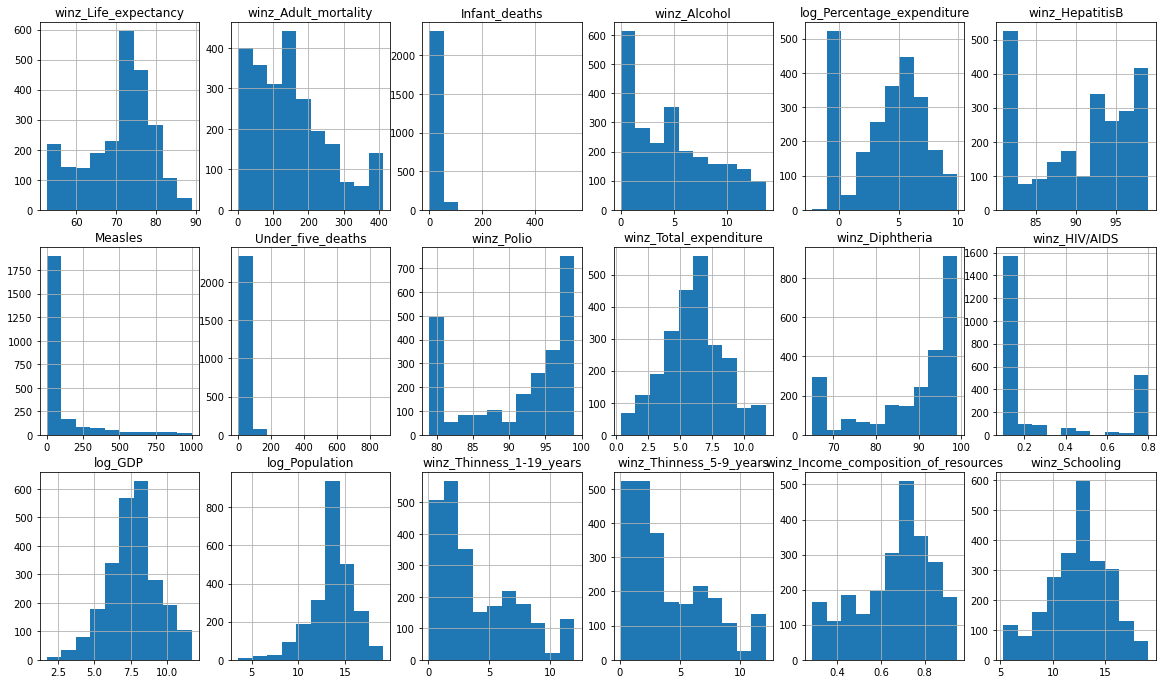

In [93]:
# now its time to explore the data
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(life_expectancy[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

<AxesSubplot:>

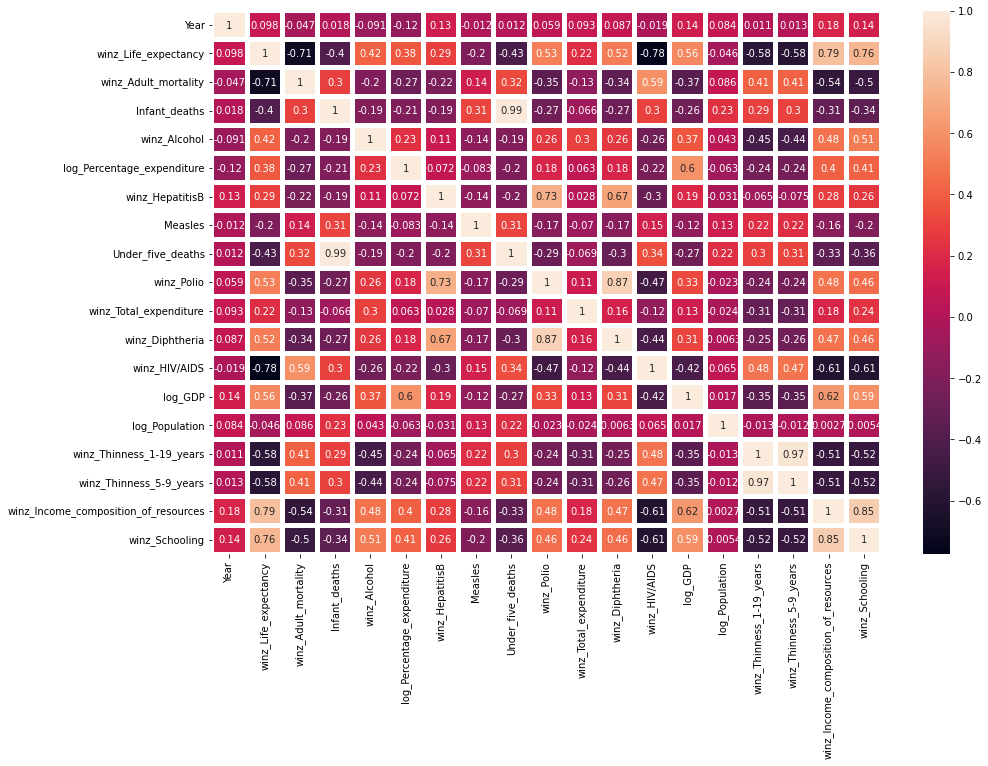

In [94]:
life_exp = life_expectancy[['Year', 'Country', 'Status','winz_Life_expectancy','winz_Adult_mortality','Infant_deaths','winz_Alcohol',
            'log_Percentage_expenditure','winz_HepatitisB','Measles','Under_five_deaths','winz_Polio',
            'winz_Total_expenditure','winz_Diphtheria','winz_HIV/AIDS','log_GDP','log_Population',
            'winz_Thinness_1-19_years','winz_Thinness_5-9_years','winz_Income_composition_of_resources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

Thoughts from the heatmap:
* Life expectancy negative corr. w/ adult mortality
* Life expectancy positive corr. w/ % Polio immunization among 1 year olds
* Life expectancy positive corr. w/ % Diphtheria immunization among 1 year olds
* Life expectancy negative corr. w/ deaths from HIV/AIDS per 1000 live births
* Life expectancy positive corr. w/ country GDP (in USD)
* Life expectancy negative corr. w/ % prevalence of thinness among children from 10-19 years of age
* Life expectancy negative corr. w/ % prevalence of thinness among children from 1-9 years of age
* Life expectancy positive corr. w/ Human Development Index (HDI) in terms of income composition of resources
* Life expectancy positive corr. w/ number of years of schooling

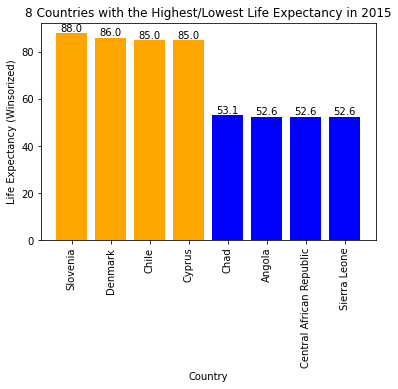

In [131]:
df_filtered = life_exp.loc[life_exp['Year'] == 2015]
df_largest = df_filtered.nlargest(4, 'winz_Life_expectancy')
df_bigsmall = df_largest.append(df_filtered.nsmallest(4, 'winz_Life_expectancy'))
df_bigsmall.sort_values('winz_Life_expectancy', ascending=False, inplace=True)
bars = plt.bar(df_bigsmall['Country'], df_bigsmall['winz_Life_expectancy'],
color=['orange',]*4+['blue']*4)
plt.xticks(rotation=90) 
plt.title("8 Countries with the Highest/Lowest Life Expectancy in 2015")
plt.xlabel("Country")
plt.ylabel("Life Expectancy (Winsorized)")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + .4, yval, yval,
    horizontalalignment="center",
    verticalalignment="bottom")

plt.show()

In [103]:
# lets look closer at slovenia
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(life_exp.loc[life_exp['Country'] == 'Slovenia'].loc[life_exp['Year'] == 2015])

,Year,Country,Status,winz_Life_expectancy,winz_Adult_mortality,Infant_deaths,winz_Alcohol,log_Percentage_expenditure,winz_HepatitisB,Measles,Under_five_deaths,winz_Polio,winz_Total_expenditure,winz_Diphtheria,winz_HIV/AIDS,log_GDP,log_Population,winz_Thinness_1-19_years,winz_Thinness_5-9_years,winz_Income_composition_of_resources,winz_Schooling
146,2015,Slovenia,Developed,88.0,74.0,0,5.285,0.0,93.0,18,0,95.0,7.08,95.0,0.1,7.912007,12.481926,1.4,1.3,0.888,17.3


Notes:
* Slovenia is a developed country
* High HepB and Polio vaccination rates 
* Spends 7.08 percent of its government's total expenditure on health
* Large number of years (17) in schooling

In [134]:
status_life_exp = life_expectancy.groupby(by=['Status']).mean().reset_index().sort_values('winz_Life_expectancy',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))

colors = ['orange',]*4 + ['blue',]*4

fig = px.bar(status_life_exp, x='Status', y='winz_Life_expectancy', 
color='Status',
color_discrete_map={
    'Developed':'orange',
    'Developing':'blue'
})

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            size=20,
            color="black"
        )
    )
fig.show()

<Figure size 1440x720 with 0 Axes>

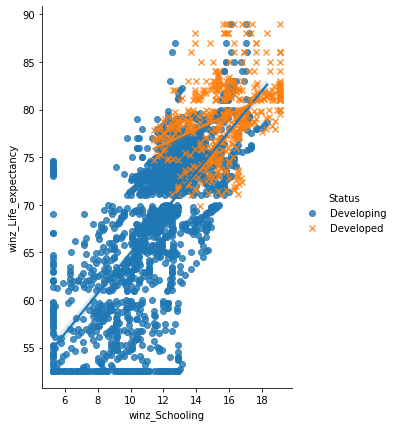

In [117]:
sns.pairplot(life_expectancy, x_vars=["winz_Schooling",], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=6, aspect=.7, kind="reg")

(60.0, 90.0)

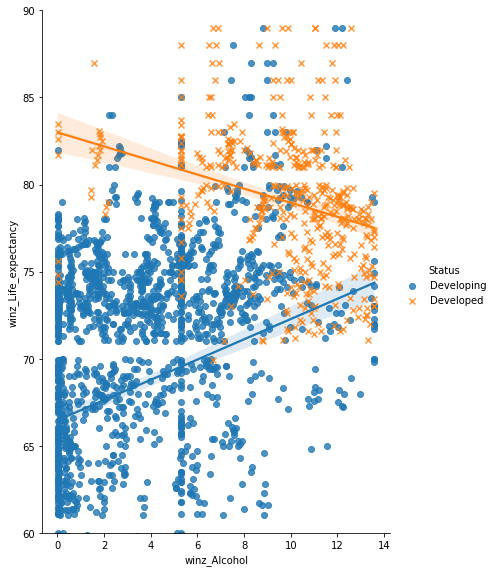

In [118]:
sns.pairplot(life_expectancy, x_vars=["winz_Alcohol"], y_vars=["winz_Life_expectancy"],
             hue="Status",markers=["o", "x"], height=8, aspect=.7, kind="reg")
plt.ylim(60, 90)